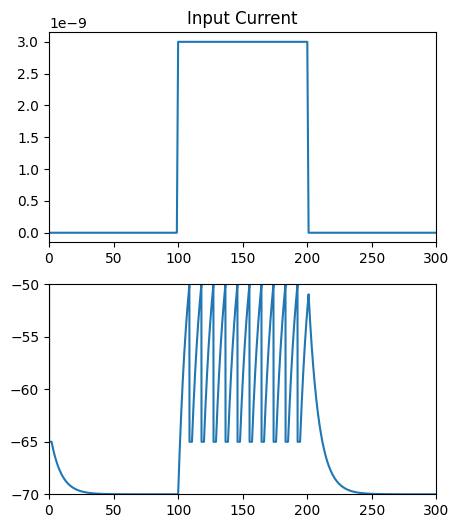

In [5]:
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np

def lif_neuron(curr, run_time, v_rest=-70*mV, v_reset=-65*mV, threshold=-50*mV, membrane_r=10.*Mohm, time_constant=8.*ms, refractory_period=2.0*ms):
    eqs = '''
    dv/dt = ( -(v - v_rest) + membrane_r * curr(t, i) ) / time_constant : volt (unless refractory)
    '''
    G = NeuronGroup(
    1, eqs, threshold='v > threshold', 
    reset="v = v_reset", method="linear", refractory=refractory)
    M = StateMonitor(G, True, True)
    S = SpikeMonitor(G)
    run(run_time)
    return M, S

v_rest = -70 * mV
v_reset = -65 * mV
threshold = -50 * mV
R = 10. * Mohm
tau = 8. * ms
refractory = 2.0 * ms
    
tmp = np.zeros((300, 1)) * amp
tmp[100: 200 + 1, 0] = 3*namp
curr = TimedArray(tmp, dt=1. * ms)

start_scope()

M, S = lif_neuron(curr, 300*ms)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6))

ax1.plot(curr)
ax2.plot(M.t/ms, M.v[0]/mV)

ax1.set_xlim(0, 300)
# ax1.set_ylim(-1*namp, 3*namp)
ax1.set_title("Input Current")

ax2.set_xlim(0, 300)
ax2.set_ylim(-70, -50);

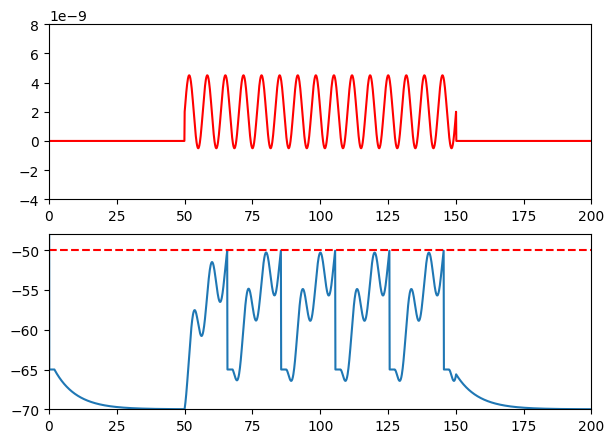

In [161]:
from neurodynex3.tools import input_factory, plot_tools

start_scope()

curr = input_factory.get_sinusoidal_current(
        500, 1500, unit_time=0.1 * ms,
        amplitude=2.5 * namp, frequency=150 * Hz, direct_current=2. * namp)

M, S = lif_neuron(curr, 200*ms)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5))

t_range = np.linspace(0, 200, 2000) * b2.ms
current_values = curr(t_range, 0)

ax1.plot(t_range/ms, current_values, color="red")
ax1.set_xlim(0, 200)
ax1.set_ylim(-4*namp, 8*namp)

ax2.plot(M.t/ms, M.v[0]/mV)
ax2.set_xlim(0, 200)
ax2.set_ylim(-70, -48);
ax2.axhline(-50, color="red", ls="--");